<center><h1><b><span style="color:blue">Particles &amp; decays</span></b></h1></center>

&nbsp;<br>
**Particles and decays are central "concepts" in Particle Physics.** Could one really do without dedicated packages in the ecosystem? ...
Of course not!

### **Quick intro to the following packages**
- [Particle](https://github.com/scikit-hep/particle) - *Particle Data Group* particle data, Monte Carlo identification codes, and more.
- [DecayLanguage](https://github.com/scikit-hep/decaylanguage) - Decay files (notably for EvtGen), universal description of decay chains.

&nbsp;
<center><img src="images/logo_Particle.png" alt="Particle package logo" style="width: 150px;"/></center>

<center><h2><b><span style="color:green">PDG particle data, MC identification codes</span></b></h2></center>

**The [Particle Data Group](https://pdg.lbl.gov/) (PDG) is an "international collaboration that provides a comprehensive summary of Particle Physics and related areas of Cosmology: the Review of Particle Physics."**

<center><img src="images/PDG_homepage.png" style="width:55%"/></center>

The **Review of Particle Physics** is a document whose importance is impossible to oversell.
Some interesting facts about it and its more recent edition [https://pdg.lbl.gov/#about]:

<center><img src="images/PDG_about.png" style="width:55%"/></center>

### Package motivation - particle data

- The PDG provides a series of downloadable <span style="color:green">*Computer Readable Files* and in particular a table of particle masses, widths, etc. and PDG Monte Carlo particle ID numbers</span> (PDG IDs).
The most recent file is [here](http://pdg.lbl.gov/2021/html/computer_read.html).
- It <span style="color:green">also provided an experimental file with extended information</span>
(spin, quark content, P and C parities, etc.) until 2008 only, see [here](http://pdg.lbl.gov/2008/html/computer_read.html) (not widely known!).

- But <span style="color:green"><i>anyone</i> wanting to use these data</span>, the only readily available,
<span style="color:green">has to parse the file programmatically</span>.
- Why not make a Python package to deal with all these data, for everyone?

### Package motivation - MC identification codes

- The <span style="color:green">C++ HepPID and HepPDT libraries provide functions for processing particle ID codes</apan>
in the standard particle (aka PDG) numbering scheme.
- Different event generators may have their separate set of particle IDs: Geant3, etc.
- Again, why not make a package providing all functionality/conversions, Python-ically, for everyone?

### **Pythonic interface to**
- Particle Data Group (PDG) particle data table.
- Particle MC identification codes, with inter-MC converters.
- With various extra goodies.

### Package, in short

- <span style="color:green">Particle</span> - loads extended <b>PDG data tables</b> and implements search and manipulations / display.
- <span style="color:green">PDGID</span> - find out as much as possible from the PDG ID number. <b>No table lookup</b>.
- <span style="color:green">Converters for MC IDs</span> used in [Pythia](https://pythia.org/) and Geant3.
- Flexible / advanced usage programmatically.
- Basic usage via the command line.

### **1. `PDGID` class and MC ID classes**


- Classes `PDGID`, `PythiaID`, `Geant3ID`.
- Converters in module `particle.converters`: `Geant2PDGIDBiMap`, etc.

#### PDG IDs module overview

- <span style="color:green">Process and query PDG IDs</span>, and more – no look-up table needed.
  - Current version of package reflects the latest version of the
    <span style="color:green">HepPID & HepPDT utility functions</span> defined in the C++ HepPID and HepPDT versions 3.04.01
  - It contains more functionality than that available in the C++ code … and minor fixes too.
- Definition of a <span style="color:green">PDGID class, PDG ID literals</span>,
and set of standalone HepPID <span style="color:green">functions to query PDG IDs</span>
(is_meson, has_bottom, j_spin, charge, etc.).
   - All PDGID class functions are available standalone.

#### PDGID class
- Wrapper class `PDGID` for PDG IDs.
- Behaves like an int, with extra goodies.
- Large spectrum of properties and methods, with a Pythonic interface, and yet more!

In [1]:
from particle import PDGID

In [2]:
pid = PDGID(211)
pid

<PDGID: 211>

In [3]:
PDGID(99999999)

<PDGID: 99999999 (is_valid==False)>

In [4]:
from particle.pdgid import is_meson

pid.is_meson, is_meson(pid)

(True, True)

To print all `PDGID` properties:

In [5]:
print(pid.info())

A              None
J              0.0
L              0
S              0
Z              None
abspid         211
charge         1.0
has_bottom     False
has_charm      False
has_down       True
has_fundamental_anti False
has_strange    False
has_top        False
has_up         True
is_Qball       False
is_Rhadron     False
is_SUSY        False
is_baryon      False
is_diquark     False
is_dyon        False
is_excited_quark_or_lepton False
is_gauge_boson_or_higgs False
is_generator_specific False
is_hadron      True
is_lepton      False
is_meson       True
is_nucleus     False
is_pentaquark  False
is_quark       False
is_sm_gauge_boson_or_higgs False
is_sm_lepton   False
is_sm_quark    False
is_special_particle False
is_technicolor False
is_valid       True
j_spin         1
l_spin         1
s_spin         1
three_charge   3



#### MC ID classes and converters

- <span style="color:green">Classes for MC IDs</span> used in Pythia and Geant3: `PythiaID` and `Geant3ID`.
- <span style="color:green">ID converters</span> in module `particle.converters`: `Geant2PDGIDBiMap`, etc.

In [6]:
from particle import PythiaID, Geant3ID

pyid = PythiaID(10221)

pyid.to_pdgid()

<PDGID: 9010221>

Conversions are directly available via mapping classes.

E.g., bi-directional map Pythia ID - PDG ID:

In [7]:
from particle.converters import Pythia2PDGIDBiMap

Pythia2PDGIDBiMap[PDGID(9010221)]

<PythiaID: 10221>

In [8]:
Pythia2PDGIDBiMap[PythiaID(10221)]

<PDGID: 9010221>

### **2. `Particle` class**

There are various ways to create a particle. The often used method is via its PDG ID.

In [9]:
from particle import Particle

In [10]:
Particle.from_pdgid(211)

<Particle: name="pi+", pdgid=211, mass=139.57039 ± 0.00018 MeV>

#### Searching

<span style="color:green">Simple and natural API</span> to deal with the PDG particle data table,<br>with <span style="color:green">powerful 1-line search and look-up utilities!</span>

- `Particle.finditer(…)` – search for a particle, returning an iterator of candidates.
- `Particle.findall(…)` – search a list of candidates.

- Search methods that can query any particle property!

In [11]:
(p,) = Particle.finditer(
    "J/psi"
)  # syntax (p,) throws an error if < 1 or > 1 particle is found
p

<Particle: name="J/psi(1S)", pdgid=443, mass=3096.900 ± 0.006 MeV>

Alternative way - directly get a particle by name:

In [12]:
Particle.from_evtgen_name('J/psi')

<Particle: name="J/psi(1S)", pdgid=443, mass=3096.900 ± 0.006 MeV>

You can specify search terms as keywords - _any particle property_:

You can directly check the numeric charge:

In [13]:
Particle.findall('pi', charge=-1)

[<Particle: name="pi-", pdgid=-211, mass=139.57039 ± 0.00018 MeV>,
 <Particle: name="pi(2)(1670)-", pdgid=-10215, mass=1670.6 + 2.9 - 1.2 MeV>,
 <Particle: name="pi(1300)-", pdgid=-100211, mass=1300 ± 100 MeV>,
 <Particle: name="pi(1)(1400)-", pdgid=-9000213, mass=1354 ± 25 MeV>,
 <Particle: name="pi(1800)-", pdgid=-9010211, mass=1810 + 9 - 11 MeV>,
 <Particle: name="pi(1)(1600)-", pdgid=-9010213, mass=1661 + 15 - 11 MeV>]

Or use a **lambda function** for the ultimate general search! For example, to find all the neutral particles with a bottom quark between 5.2 and 5.3 GeV:

In [14]:
from hepunits import GeV, s  # Units are good. Use them.

In [15]:
Particle.findall(lambda p:
                     p.pdgid.has_bottom
                     and p.charge==0
                     and 5.2*GeV < p.mass < 5.3*GeV
                )

[<Particle: name="B0", pdgid=511, mass=5279.66 ± 0.12 MeV>,
 <Particle: name="B~0", pdgid=-511, mass=5279.66 ± 0.12 MeV>]

Another lambda function example: You can use the width or the lifetime:

In [16]:
Particle.findall(lambda p: p.lifetime > 1000*s)

[<Particle: name="e-", pdgid=11, mass=0.51099895000 ± 0.00000000015 MeV>,
 <Particle: name="e+", pdgid=-11, mass=0.51099895000 ± 0.00000000015 MeV>,
 <Particle: name="nu(e)", pdgid=12, mass=None>,
 <Particle: name="nu(e)~", pdgid=-12, mass=None>,
 <Particle: name="nu(mu)", pdgid=14, mass=None>,
 <Particle: name="nu(mu)~", pdgid=-14, mass=None>,
 <Particle: name="nu(tau)", pdgid=16, mass=None>,
 <Particle: name="nu(tau)~", pdgid=-16, mass=None>,
 <Particle: name="g", pdgid=21, mass=0.0 MeV>,
 <Particle: name="gamma", pdgid=22, mass=0.0 MeV>,
 <Particle: name="p", pdgid=2212, mass=938.2720882 ± 0.0000003 MeV>,
 <Particle: name="p~", pdgid=-2212, mass=938.2720882 ± 0.0000003 MeV>,
 <Particle: name="p", pdgid=1000010010, mass=938.2720882 ± 0.0000003 MeV>,
 <Particle: name="p~", pdgid=-1000010010, mass=938.2720882 ± 0.0000003 MeV>]

If you want infinite lifetime, you could just use the keyword search instead:

In [17]:
Particle.findall(lifetime=float('inf'))

[<Particle: name="e-", pdgid=11, mass=0.51099895000 ± 0.00000000015 MeV>,
 <Particle: name="e+", pdgid=-11, mass=0.51099895000 ± 0.00000000015 MeV>,
 <Particle: name="nu(e)", pdgid=12, mass=None>,
 <Particle: name="nu(e)~", pdgid=-12, mass=None>,
 <Particle: name="nu(mu)", pdgid=14, mass=None>,
 <Particle: name="nu(mu)~", pdgid=-14, mass=None>,
 <Particle: name="nu(tau)", pdgid=16, mass=None>,
 <Particle: name="nu(tau)~", pdgid=-16, mass=None>,
 <Particle: name="g", pdgid=21, mass=0.0 MeV>,
 <Particle: name="gamma", pdgid=22, mass=0.0 MeV>,
 <Particle: name="p", pdgid=2212, mass=938.2720882 ± 0.0000003 MeV>,
 <Particle: name="p~", pdgid=-2212, mass=938.2720882 ± 0.0000003 MeV>,
 <Particle: name="p", pdgid=1000010010, mass=938.2720882 ± 0.0000003 MeV>,
 <Particle: name="p~", pdgid=-1000010010, mass=938.2720882 ± 0.0000003 MeV>]

Trivially find all pseudoscalar charm mesons:

In [18]:
from particle import SpinType

Particle.findall(lambda p: p.pdgid.is_meson and p.pdgid.has_charm and p.spin_type==SpinType.PseudoScalar)

[<Particle: name="D+", pdgid=411, mass=1869.66 ± 0.05 MeV>,
 <Particle: name="D-", pdgid=-411, mass=1869.66 ± 0.05 MeV>,
 <Particle: name="D0", pdgid=421, mass=1864.84 ± 0.05 MeV>,
 <Particle: name="D~0", pdgid=-421, mass=1864.84 ± 0.05 MeV>,
 <Particle: name="D(s)+", pdgid=431, mass=1968.35 ± 0.07 MeV>,
 <Particle: name="D(s)-", pdgid=-431, mass=1968.35 ± 0.07 MeV>,
 <Particle: name="eta(c)(1S)", pdgid=441, mass=2983.9 ± 0.4 MeV>,
 <Particle: name="B(c)+", pdgid=541, mass=6274.5 ± 0.3 MeV>,
 <Particle: name="B(c)-", pdgid=-541, mass=6274.5 ± 0.3 MeV>,
 <Particle: name="eta(c)(2S)", pdgid=100441, mass=3637.7 ± 1.1 MeV>]

#### Display

Nice display in Jupyter notebooks, as well as `str` and `repr` support:

In [19]:
p = Particle.from_pdgid(-415)
p

<Particle: name="D(2)*(2460)-", pdgid=-415, mass=2461.1 + 0.7 - 0.8 MeV>

In [20]:
print(p)

D(2)*(2460)-


In [21]:
print(repr(p))

<Particle: name="D(2)*(2460)-", pdgid=-415, mass=2461.1 + 0.7 - 0.8 MeV>


Full descriptions:

In [22]:
print(p.describe())

Name: D(2)*(2460)-   ID: -415         Latex: $D_{2}^{*}(2460)^{-}$
Mass  = 2461.1 + 0.7 - 0.8 MeV
Width = 47.3 ± 0.8 MeV
Q (charge)        = -       J (total angular) = 2.0      P (space parity) = +
C (charge parity) = None    I (isospin)       = 0.5      G (G-parity)     = None
    SpinType: 3
    Quarks: Cd
    Antiparticle name: D(2)*(2460)+ (antiparticle status: ChargeInv)


You may find LaTeX or HTML to be more useful in your program; both are supported:

In [23]:
print(p.latex_name, '\n', p.html_name)

D_{2}^{*}(2460)^{-} 
 D<SUB>2</SUB><SUP>*</SUP>(2460)<SUP>-</SUP>


#### Particle properties

You can do things to particles, like **invert** them:

In [24]:
~p

<Particle: name="D(2)*(2460)+", pdgid=415, mass=2461.1 + 0.7 - 0.8 MeV>

There are a plethora of properties you can access:

In [25]:
p.spin_type

<SpinType.Tensor: 3>

You can quickly access the PDGID of a particle:

In [26]:
p.pdgid

<PDGID: -415>

### **3. Literals**

They provide a <span style="color:green">handy way to manipulate things with human-readable names!</span>

`Particle` defines <span style="color:green">literals for all particles</span>, with easily recognisable (programmatic friendly) names.
- Literals are dynamically generated on import for both `PDGID` and `Particle` classes.

#### Particle literals

In [27]:
from particle import literals as lp

In [28]:
lp.phi_1020

<Particle: name="phi(1020)", pdgid=333, mass=1019.461 ± 0.016 MeV>

#### PDGID literals

In [29]:
from particle.pdgid import literals as lid

In [30]:
lid.phi_1020

<PDGID: 333>

### **4. Data files, stored in `particle/data/`**

- <b>PDG particle data files</b>
  - Original PDG data files, which are in a fixed-width format - simply for bookkeeping and reference.
  - Code rather uses “digested forms” of these, produced within `Particle`, stored as CSV, for optimised querying.
  - Latest PDG data (2020) used by default.
  - Advanced usage: user can load older PDG tables, load a “user table” with new particles, append to default table.

- <b>Other data files</b>
  - CSV file for mapping of PDG IDs to particle LaTeX names.

**Dump table contents**

The package provides the 2 methods `Particle.to_list(...)` and `Particle.to_dict(...)`, which make it easy to dump (selected) particle properties in an easy way. No need to dig into the package installation directory to inspect the particle data table ;-).

Tabular output can be formatted with the powerful package `tabulate`, for example (other similar libraries exist).

In [31]:
from tabulate import tabulate

query_as_list = Particle.to_list(filter_fn=lambda p: p.pdgid.is_lepton and p.charge!=0, exclusive_fields=['pdgid', 'name', 'mass', 'charge'])

print(tabulate(query_as_list, headers="firstrow"))

  pdgid  name           mass    charge
-------  ------  -----------  --------
     11  e-         0.510999        -1
    -11  e+         0.510999         1
     13  mu-      105.658           -1
    -13  mu+      105.658            1
     15  tau-    1776.86            -1
    -15  tau+    1776.86             1
     17  tau'-                      -1
    -17  tau'+                       1


Fancy creating tables of particle properties in, say, HTML or reStructuredText format, as below?

<table>
<tr style="background: white;">
    <td align="center"><img src="images/Scikit-HEP_gallery_Particle.jpg" width="80%"></td>
    <td align="center"><img src="images/Scikit-HEP_gallery_Particle_ex-table-rst.png" width="80%"></td>
</tr>
</table>

### **5. Advanced usage**

You can:

* Extend or replace the default particle data table in `Particle`.
* Adjust properties for a particle.
* Make custom particles.

&nbsp;<br>
<center>
    <img src="images/logo_DecayLanguage.png" style="width: 200px;"/>
    <h2><b><span style="color:green">Decay files, universal description of decay chains</span></b></h2>
</center>

`DecayLanguage` is designed for the manipulation of decay structures in Python. The current package has:

- Decay file parsers:
  - Read *.dec DecFiles*, such as [EvtGen](https://evtgen.hepforge.org/)<sup>(*)</sup> decay files typically used in Flavour Physics experiments.
  - Manipulate and visualise them in Python.
- Amplitude Analysis decay language:
  - Input based on AmpGen generator, output format for GooFit C++ program.
  
> <sup>(*)</sup> *"EvtGen is a Monte Carlo event generator that simulates the decays of heavy flavour particles, primarily B and D mesons. It contains a range of decay models for intermediate and final states containing scalar, vector and tensor mesons or resonances, as well as leptons, photons and baryons. Decay amplitudes are used to generate each branch of a given full decay tree, taking into account angular and time-dependent correlations which allows for the simulation of CP-violating processes..."*

### Package motivation

- Ability to describe decay-tree-like structures.
- Any experiment uses event generators which, among many things, need to describe particle decay chains.
- Programs such as EvtGen rely on so-called .dec decay files.
- Many experiments need decay data files.
- Why not make a Python package to deal with decay files, for everyone?

### Package, in short

- Tools to parse decay files and programmatically manipulate them, query, display information.
  - Descriptions and parsing built atop the [Lark parser](https://github.com/lark-parser/lark/).
- Tools to translate decay amplitude models from AmpGen to GooFit, and manipulate them.

### **1. Decay files**

#### *Master file” DECAY.DEC

<span style="color:green">Gigantic file defining decay modes for all relevant particles, including decay model specifications.</span>
The LHCb experiment uses one. Belle II as well, and others.

#### User .dec files
- Needed to produce specific MC samples.
- Typically contain a single decay chain (except if defining inclusive samples).

**Example user decay file:**

<small>
<pre>
# Decay file for [B_c+ -> (B_s0 -> K+ K-) pi+]cc

Alias      B_c+sig        B_c+
Alias      B_c-sig        B_c-
ChargeConj B_c+sig        B_c-sig
Alias      MyB_s0         B_s0
Alias      Myanti-B_s0    anti-B_s0
ChargeConj MyB_s0         Myanti-B_s0

Decay B_c+sig
  1.000     MyB_s0     pi+     PHOTOS PHSP;
Enddecay
CDecay B_c-sig

Decay MyB_s0
    1.000     K+     K-     SSD_CP 20.e12 0.1 1.0 0.04 9.6 -0.8 8.4 -0.6;
Enddecay
CDecay Myanti-B_s0
</pre>
</small>

### **2. Decay file parsing**

- Parsing should be simple
- Parsing should be (reasonably) fast!

After parsing, many queries are possible!

In [32]:
from decaylanguage import DecFileParser

#### The LHCb "master decay file"

It's a big file! ~ 500 particle decays defined, thousands of decay modes, over 11k lines in total.

In [33]:
dfp = DecFileParser('data/DECAY_LHCB.DEC')

In [34]:
%%time
dfp.parse()

CPU times: total: 1.98 s
Wall time: 1.99 s


In [35]:
dfp

<DecFileParser: decfile(s)=['data/DECAY_LHCB.DEC'], n_decays=510>

Let's parse and play with a small decay file:

In [36]:
with open('data/Dst.dec') as f:
    print(f.read())

# Example decay chain for testing purposes
# Considered by itself, this file in in fact incomplete,
# as there are no instructions on how to decay the anti-D0 and the D-!

Decay D*+
0.6770    D0  pi+                    VSS;
0.3070    D+  pi0                    VSS;
0.0160    D+  gamma                  VSP_PWAVE;
Enddecay

Decay D*-
0.6770    anti-D0  pi-                VSS;
0.3070    D-       pi0                VSS;
0.0160    D-       gamma              VSP_PWAVE;
Enddecay

Decay D0
1.0   K-      pi+                  PHSP;
Enddecay

Decay D+
1.0   K-   pi+   pi+   pi0    PHSP;
Enddecay

Decay pi0
0.988228297   gamma   gamma                   PHSP;
0.011738247   e+      e-      gamma           PI0_DALITZ;
0.000033392   e+      e+      e-      e-      PHSP;
0.000000065   e+      e-                      PHSP;
Enddecay



In [37]:
dfp_Dst = DecFileParser('data/Dst.dec')
dfp_Dst

<DecFileParser: decfile(s)=['data/Dst.dec']>

In [38]:
dfp_Dst.parse()
dfp_Dst

<DecFileParser: decfile(s)=['data/Dst.dec'], n_decays=5>

It can be handy to **parse from a multi-line string** rather than a file:

In [39]:
s = """
# Decay file for [B_c+ -> (B_s0 -> K+ K-) pi+]cc

Alias      B_c+sig        B_c+
Alias      B_c-sig        B_c-
ChargeConj B_c+sig        B_c-sig
Alias      MyB_s0         B_s0
Alias      Myanti-B_s0    anti-B_s0
ChargeConj MyB_s0         Myanti-B_s0

Decay B_c+sig
  1.000     MyB_s0     pi+     PHOTOS PHSP;
Enddecay
CDecay B_c-sig

Decay MyB_s0
    1.000     K+     K-     SSD_CP 20.e12 0.1 1.0 0.04 9.6 -0.8 8.4 -0.6;
Enddecay
CDecay Myanti-B_s0
"""

In [40]:
dfp = DecFileParser.from_string(s)
dfp.parse()
dfp

<DecFileParser: decfile(s)=['<dec file input as a string>'], n_decays=4>

#### Decay file information

Several methods are available, e.g.:

In [41]:
dfp_Dst.list_decay_mother_names()

['D*+', 'D*-', 'D0', 'D+', 'pi0']

In [42]:
dfp_Dst.print_decay_modes('D*+')

  0.677             D0 pi+       VSS;
  0.307             D+ pi0       VSS;
  0.016             D+ gamma     VSP_PWAVE;


#### Info such as particle aliases

In [43]:
dfp.dict_aliases()

{'B_c+sig': 'B_c+',
 'B_c-sig': 'B_c-',
 'MyB_s0': 'B_s0',
 'Myanti-B_s0': 'anti-B_s0'}

In [44]:
dfp.dict_charge_conjugates()

{'B_c+sig': 'B_c-sig', 'MyB_s0': 'Myanti-B_s0'}

### **3.  Display of decay chains**

The parser can provide a simple `dict` representation of any decay chain found in the input decay file(s). Being generic and simple, that is what is used as input information for the viewer class (see below).

In [45]:
dc = dfp_Dst.build_decay_chains('D+')
dc

{'D+': [{'bf': 1.0,
   'fs': ['K-',
    'pi+',
    'pi+',
    {'pi0': [{'bf': 0.988228297,
       'fs': ['gamma', 'gamma'],
       'model': 'PHSP',
       'model_params': ''},
      {'bf': 0.011738247,
       'fs': ['e+', 'e-', 'gamma'],
       'model': 'PI0_DALITZ',
       'model_params': ''},
      {'bf': 3.3392e-05,
       'fs': ['e+', 'e+', 'e-', 'e-'],
       'model': 'PHSP',
       'model_params': ''},
      {'bf': 6.5e-08,
       'fs': ['e+', 'e-'],
       'model': 'PHSP',
       'model_params': ''}]}],
   'model': 'PHSP',
   'model_params': ''}]}

In [46]:
from decaylanguage import DecayChainViewer

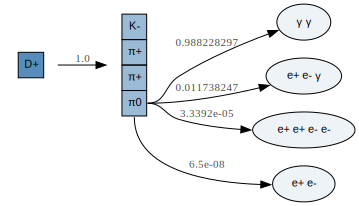

In [47]:
DecayChainViewer(dc)

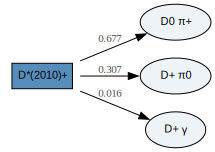

In [48]:
dc = dfp_Dst.build_decay_chains('D*+', stable_particles=['D+', 'D0', 'pi0'])
DecayChainViewer(dc)

#### **Charge conjugation**

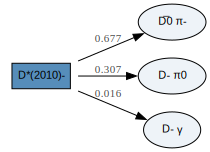

In [49]:
dc_cc = dfp_Dst.build_decay_chains('D*-', stable_particles=['D-', 'anti-D0', 'pi0'])
DecayChainViewer(dc_cc)

#### **Parsing several files**

Typically useful when the user decay file needs information from the master decay file.

In [50]:
s = u"""
Alias      MyXic+              Xi_c+
Alias      MyantiXic-          anti-Xi_c-
ChargeConj MyXic+              MyantiXic-

Decay Xi_cc+sig
  1.000       MyXic+    pi-    pi+       PHSP;
Enddecay
CDecay anti-Xi_cc-sig

Decay MyXic+
  1.000       p+    K-    pi+       PHSP;
Enddecay
CDecay MyantiXic-

End
"""

In [51]:
dfp = DecFileParser.from_string(s)
dfp.parse()
dfp

C:\home\sw\anaconda3\envs\STFC_DIS_2024\Lib\site-packages\decaylanguage\dec\dec.py:233: UserWarning: 
Corresponding 'Decay' statement for 'CDecay' statement(s) of following particle(s) not found:
anti-Xi_cc-sig.
Skipping creation of these charge-conjugate decay trees.
  self._add_charge_conjugate_decays()


<DecFileParser: decfile(s)=['<dec file input as a string>'], n_decays=3>

Note the subtletly: 3, not 4 decays, are found! This is because the file contains no statement
`ChargeConj anti-Xi_cc-sigXi_cc+sig`, hence the parser cannot know to which particle (matching `Decay` statement) the charge-conjugate decay of `anti-Xi_cc-sig` relates to (code does not rely on position of statements to guess ;-)).

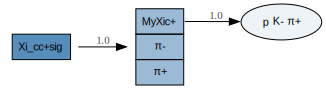

In [52]:
d = dfp.build_decay_chains('Xi_cc+sig')
DecayChainViewer(d)

As said in the warning, the information provided is not enough for the anti-Xi_cc-sig to make sense:

In [53]:
from decaylanguage.dec.dec import DecayNotFound

try:
    d = dfp.build_decay_chains('anti-Xi_cc-sig')
except DecayNotFound:
    print("Decays of particle 'anti-Xi_cc-sig' not found in .dec file!")

Decays of particle 'anti-Xi_cc-sig' not found in .dec file!


But the missing information is easily providing **parsing two files simultaneously ...!** (Any number of files is allowed.)

In [54]:
from tempfile import NamedTemporaryFile

with NamedTemporaryFile(delete=False) as tf:
    tf.write(s.encode('utf-8'))
    
dfp = DecFileParser(tf.name, 'data/DECAY_LHCB.DEC')
dfp.parse()

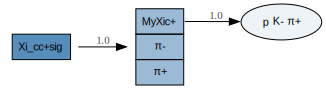

In [55]:
dc = dfp.build_decay_chains('Xi_cc+sig')

DecayChainViewer(dc)

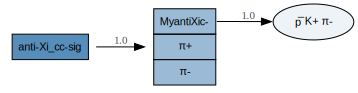

In [56]:
dc_cc = dfp.build_decay_chains('anti-Xi_cc-sig')

DecayChainViewer(dc_cc)

Want to save a graph? Try for example 
```python
dcv = DecayChainViewer(...)
dcv.graph.save(...)
```

### **4. Representation of decay chains**

<span style="color:green">The universal (and digital) representation of decay chains is of interest well outside the context of decay file parsing!</span>

#### Building blocks

- A <span style="color:green">daughters list</span> - list of final-state particles.
- A <span style="color:green">decay mode</span> - typically a branching fraction and a list of final-state particles (may also contain _any_ metadata such as decay model and optional decay-model parameters, as defined for example in .dec decay files).
- A <span style="color:green">decay chain</span> - can be seen as a mother particle and a list of decay modes.

In [57]:
from decaylanguage import DaughtersDict, DecayMode, DecayChain

**Daughters list** (actually a ``Counter`` dictionary, internally):

In [58]:
# Constructor from a dictionary
dd = DaughtersDict({'K+': 1, 'K-': 2, 'pi+': 1, 'pi0': 1})

# Constructor from a list of particle names
dd = DaughtersDict(['K+', 'K-', 'K-', 'pi+', 'pi0'])

# Constructor from a string representing the final state
dd = DaughtersDict('K+ K- pi0')
dd

<DaughtersDict: ['K+', 'K-', 'pi0']>

#### Decay Modes

In [59]:
# A 'default' and hence empty, decay mode
dm = DecayMode()

# Decay mode with minimal input information
dd = DaughtersDict('K+ K-')
dm = DecayMode(0.5, dd)

# Decay mode with decay model information and user metadata
dm = DecayMode(0.2551,                                              # branching fraction
               'pi- pi0 nu_tau',                                    # final-state particles
               model='TAUHADNU',                                    # decay model
               model_params=[-0.108, 0.775, 0.149, 1.364, 0.400],   # decay-model parameters
               study='toy', year=2019                               # user metadata
              )
dm

<DecayMode: daughters=nu_tau pi- pi0, BF=0.2551>

In [60]:
print(dm.describe())

Daughters: pi- pi0 nu_tau , BF: 0.2551         
    Decay model: TAUHADNU [-0.108, 0.775, 0.149, 1.364, 0.4]
    Extra info:
        study: toy
        year: 2019



Various manipulations are available:

In [61]:
dm = DecayMode.from_pdgids(0.5, [321, -321])
print(dm)

dm = DecayMode(1.0, 'K+ K+ pi-')
dm.charge_conjugate()

<DecayMode: daughters=K+ K-, BF=0.5>


<DecayMode: daughters=K- K- pi+, BF=1.0>

#### Decay chains 

In [62]:
dm1 = DecayMode(0.0124, 'K_S0 pi0', model='PHSP')
dm2 = DecayMode(0.692, 'pi+ pi-')
dm3 = DecayMode(0.98823, 'gamma gamma')
dc = DecayChain('D0', {'D0':dm1, 'K_S0':dm2, 'pi0':dm3})

dc

<DecayChain: D0 -> K_S0 pi0 (2 sub-decays), BF=0.0124>

In [63]:
dc.decays

{'D0': <DecayMode: daughters=K_S0 pi0, BF=0.0124>,
 'K_S0': <DecayMode: daughters=pi+ pi-, BF=0.692>,
 'pi0': <DecayMode: daughters=gamma gamma, BF=0.98823>}

Flatten the decay chain, i.e. replace all intermediate, decaying particles, with their final states:
- The BF is now the *visible BF*

In [64]:
dc.flatten()

<DecayChain: D0 -> gamma gamma pi+ pi- (0 sub-decays), BF=0.008479803984>

Of course you can sill just as easily visualise decays defined via this `DecayChain` class:

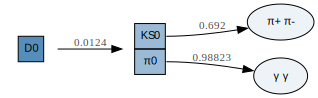

In [65]:
DecayChainViewer(dc.to_dict())